In [1]:
import yan_time_series_forecasting

2021-12-03 17:39:45.424427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-03 17:39:45.424465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
21/12/03 17:39:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/03 17:39:48 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import datetime

In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [4]:
prediction_len = 30

In [5]:
daily = pd.read_csv('/data/daily.csv')

In [6]:
#household_id = 'MAC004179'
household_id = 'MAC002761'
#household_id = 'MAC002137'

In [7]:
household = pysqldf(u"""
    select *
    from daily
    where LCLid = '%s'
    """%(household_id))

In [8]:
household.to_csv('%s.csv'%(household_id), header = True)

In [9]:
input_csv = '%s.csv'%(household_id)
date_column_name = 'day'
value_column_name = 'energy_median'
sliding_window_size = 20

date, y, x = yan_time_series_forecasting.time_series2feature_label_array(
	input_csv,
	date_column_name,
	value_column_name,
	x_npy = '/data/x.npy',
	y_npy = '/data/y.npy',
	date_npy = '/data/date.npy',
	)

21/12/03 17:39:53 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
21/12/03 17:39:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/12/03 17:39:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/12/03 17:39:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/12/03 17:39:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
21/12/03 17:39:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradat

In [10]:
time_series_model = yan_time_series_forecasting.training_time_series_model(
	x, y, 
	model_path = '/data/time_series.h5',
    max_iter = 500,
	)

2021-12-03 17:39:58.188508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-03 17:39:58.188575: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-03 17:39:58.188593: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (93a1e6bf0d27): /proc/driver/nvidia/version does not exist
2021-12-03 17:39:58.188839: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 9.2595e-04
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 1.4243e-04
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 2.5780e-04
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 3.0815e-04
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 1.1737e-04
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 5.3917e-05
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 9.4805e-05
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 1.1689e-04
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 8.3540e-05
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 5.0816e-05
Epoch 11/500
2/2 [==============================] - 0s 8ms/step - loss: 6.4617e-05
Epoch 12/500
2/2 [==============================] - 0s 7ms/step - loss: 7.7671e-05
Epoch 13

2/2 [==============================] - 0s 8ms/step - loss: 3.1915e-05
Epoch 100/500
2/2 [==============================] - 0s 10ms/step - loss: 3.5213e-05
Epoch 101/500
2/2 [==============================] - 0s 7ms/step - loss: 3.1398e-05
Epoch 102/500
2/2 [==============================] - 0s 8ms/step - loss: 3.1470e-05
Epoch 103/500
2/2 [==============================] - 0s 8ms/step - loss: 3.1199e-05
Epoch 104/500
2/2 [==============================] - 0s 8ms/step - loss: 3.3142e-05
Epoch 105/500
2/2 [==============================] - 0s 8ms/step - loss: 3.3711e-05
Epoch 106/500
2/2 [==============================] - 0s 8ms/step - loss: 3.1441e-05
Epoch 107/500
2/2 [==============================] - 0s 8ms/step - loss: 3.1705e-05
Epoch 108/500
2/2 [==============================] - 0s 9ms/step - loss: 3.3227e-05
Epoch 109/500
2/2 [==============================] - 0s 8ms/step - loss: 3.2023e-05
Epoch 110/500
2/2 [==============================] - 0s 7ms/step - loss: 3.2412e-05
Epoch

2/2 [==============================] - 0s 13ms/step - loss: 2.8714e-05
Epoch 197/500
2/2 [==============================] - 0s 7ms/step - loss: 2.8374e-05
Epoch 198/500
2/2 [==============================] - 0s 8ms/step - loss: 2.7441e-05
Epoch 199/500
2/2 [==============================] - 0s 7ms/step - loss: 2.8715e-05
Epoch 200/500
2/2 [==============================] - 0s 9ms/step - loss: 2.8154e-05
Epoch 201/500
2/2 [==============================] - 0s 8ms/step - loss: 2.8958e-05
Epoch 202/500
2/2 [==============================] - 0s 8ms/step - loss: 2.8163e-05
Epoch 203/500
2/2 [==============================] - 0s 9ms/step - loss: 2.7094e-05
Epoch 204/500
2/2 [==============================] - 0s 12ms/step - loss: 2.7669e-05
Epoch 205/500
2/2 [==============================] - 0s 10ms/step - loss: 2.8517e-05
Epoch 206/500
2/2 [==============================] - 0s 8ms/step - loss: 2.7464e-05
Epoch 207/500
2/2 [==============================] - 0s 9ms/step - loss: 2.7024e-05
Epo

2/2 [==============================] - 0s 8ms/step - loss: 2.5420e-05
Epoch 294/500
2/2 [==============================] - 0s 8ms/step - loss: 2.5174e-05
Epoch 295/500
2/2 [==============================] - 0s 8ms/step - loss: 2.6199e-05
Epoch 296/500
2/2 [==============================] - 0s 8ms/step - loss: 2.5466e-05
Epoch 297/500
2/2 [==============================] - 0s 9ms/step - loss: 2.5321e-05
Epoch 298/500
2/2 [==============================] - 0s 9ms/step - loss: 2.5519e-05
Epoch 299/500
2/2 [==============================] - 0s 9ms/step - loss: 2.6332e-05
Epoch 300/500
2/2 [==============================] - 0s 9ms/step - loss: 2.6301e-05
Epoch 301/500
2/2 [==============================] - 0s 9ms/step - loss: 2.5107e-05
Epoch 302/500
2/2 [==============================] - 0s 8ms/step - loss: 2.4757e-05
Epoch 303/500
2/2 [==============================] - 0s 8ms/step - loss: 2.5891e-05
Epoch 304/500
2/2 [==============================] - 0s 8ms/step - loss: 2.5321e-05
Epoch 

2/2 [==============================] - 0s 8ms/step - loss: 2.4059e-05
Epoch 391/500
2/2 [==============================] - 0s 8ms/step - loss: 2.4715e-05
Epoch 392/500
2/2 [==============================] - 0s 9ms/step - loss: 2.3600e-05
Epoch 393/500
2/2 [==============================] - 0s 9ms/step - loss: 2.4668e-05
Epoch 394/500
2/2 [==============================] - 0s 8ms/step - loss: 2.4264e-05
Epoch 395/500
2/2 [==============================] - 0s 7ms/step - loss: 2.4379e-05
Epoch 396/500
2/2 [==============================] - 0s 7ms/step - loss: 2.4851e-05
Epoch 397/500
2/2 [==============================] - 0s 8ms/step - loss: 2.3764e-05
Epoch 398/500
2/2 [==============================] - 0s 8ms/step - loss: 2.3039e-05
Epoch 399/500
2/2 [==============================] - 0s 7ms/step - loss: 2.3657e-05
Epoch 400/500
2/2 [==============================] - 0s 8ms/step - loss: 2.4762e-05
Epoch 401/500
2/2 [==============================] - 0s 8ms/step - loss: 2.3982e-05
Epoch 

2/2 [==============================] - 0s 9ms/step - loss: 2.3167e-05
Epoch 488/500
2/2 [==============================] - 0s 9ms/step - loss: 2.2524e-05
Epoch 489/500
2/2 [==============================] - 0s 9ms/step - loss: 2.3238e-05
Epoch 490/500
2/2 [==============================] - 0s 9ms/step - loss: 2.3576e-05
Epoch 491/500
2/2 [==============================] - 0s 14ms/step - loss: 2.3808e-05
Epoch 492/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2689e-05
Epoch 493/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2382e-05
Epoch 494/500
2/2 [==============================] - 0s 9ms/step - loss: 2.2048e-05
Epoch 495/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2485e-05
Epoch 496/500
2/2 [==============================] - 0s 8ms/step - loss: 2.2003e-05
Epoch 497/500
2/2 [==============================] - 0s 9ms/step - loss: 2.2972e-05
Epoch 498/500
2/2 [==============================] - 0s 9ms/step - loss: 2.3053e-05
Epoch

In [11]:
prediction = yan_time_series_forecasting.predict_time_series_from_model(
	x_npy = '/data/x.npy', 
	y_npy = '/data/y.npy', 
	date_npy = '/data/date.npy',
	model_path = '/data/time_series.h5',
	output_prediction_json = '/data/prediction.json',
	)

In [12]:
date = np.load('/data/date.npy')

In [13]:
y = np.load('/data/y.npy')

In [14]:
x = np.load('/data/x.npy')

### see the historical prediction

In [15]:
result = []

for r in zip(date, y, prediction):
    r1 = {'day':str(r[0]), 'ground_truth':float(r[1][0]), 'predition':float(r[2][0])}
    result.append(r1)   

In [16]:
result_df = pd.DataFrame(result)
result_df['day'] = pd.to_datetime(
    result_df['day'],
    format='%Y-%m-%d')

<AxesSubplot:>

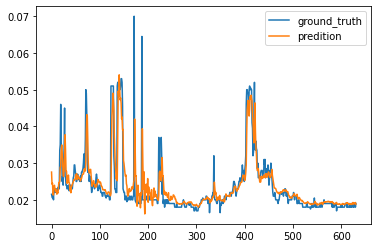

In [17]:
df = result_df
df = df.set_index('day')
result_df[['ground_truth','predition']].plot()

### prediction of the next 7 days

In [18]:
model_path = '/data/time_series.h5'
model = tf.keras.models.load_model(model_path)

In [19]:
x_current = np.array([x[-1]])

In [20]:
for i in range(prediction_len):
    ###new predition
    prediction_new = model.predict(x_current)
    prediction = np.concatenate((prediction, prediction_new))
    ###new date
    year, month, day = date[-1].split('-')
    date_current = datetime.datetime(int(year),int(month), int(day))
    date_new = date_current + datetime.timedelta(days=1)
    date_new = date_new.strftime("%Y-%m-%d")
    date = np.concatenate((date, np.array([date_new])))
    ####next input
    x_next = np.concatenate((x_current[0][1:], prediction_new[0]))
    x_current = np.expand_dims(x_next, 0)

In [21]:
prediction_df = []

for d, p in zip(date, prediction):
    r = {'day_prediction':d, 'prediction':p[0], 'LCLid':household_id}
    prediction_df.append(r)    

prediction_df = pd.DataFrame(prediction_df)

<AxesSubplot:>

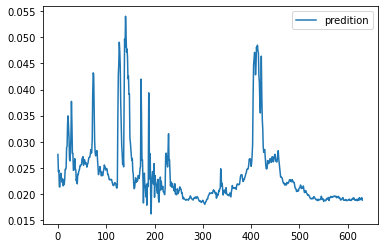

In [22]:
df = prediction_df
df = df.set_index('day_prediction')
result_df[['predition']].plot()

In [23]:
#prediction_df['day'] = prediction_df['day'].astype('str')
prediction_df.to_json(
    '/data/prediction/%s.json'%(household_id),
    lines = True, 
    orient = 'records',
    )